In [53]:
from sklearn.datasets import fetch_openml
import numpy as np 
import matplotlib.pyplot as plt 
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
Y = mnist.target.astype(int)

In [4]:
X = X/255.0

In [7]:
def one_hot(Y,num_classes = 10):
    return np.eye(num_classes)[Y]
Y = one_hot(Y)

In [9]:
X.shape[0]

70000

In [15]:
W1 = np.random.uniform(-0.5,0.5,(32,784))
W2 = np.random.uniform(-0.5,0.5,(10,32))
B1 = np.zeros((32,1))
B2 = np.zeros((10,1))

In [21]:
epochs = 10
lr = 0.01 
batch_size = 32
nr_correct = 0
for epoch in range(epochs):
    checkpoint = 0
    while checkpoint+batch_size <= X.shape[0]:
        img_input = np.array(X[checkpoint:checkpoint+batch_size]).T
        hidden_layer = np.dot(W1,img_input) + B1  #1st Hidden Layer 
        act_hl = np.maximum(0,hidden_layer)   # Activation function relu 
        output_layer = np.dot(W2,act_hl) + B2 # Output Layer 
        act_ol = 1/(1+np.exp(-output_layer))  # Sigmoid Function 
        batch_labels = Y[checkpoint:checkpoint+batch_size].T
        loss_c = -np.mean(np.sum(batch_labels * np.log(act_ol + 1e-8) + (1 - batch_labels) * np.log(1 - act_ol + 1e-8)))
        predictions = np.argmax(act_ol, axis=0)
        labels = np.argmax(batch_labels, axis=0)
        nr_correct += np.sum(predictions == labels)
        dZ2 = act_ol - Y[checkpoint:checkpoint+batch_size].T      
        dW2 = np.dot(dZ2, act_hl.T) / batch_size   
        dB2 = np.sum(dZ2, axis=1, keepdims=True) / batch_size  # sum over batch of dZ2
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * (hidden_layer > 0)
        dW1 = np.dot(dZ1,img_input.T) / batch_size 
        dB1 = np.sum(dZ1, axis = 1, keepdims = True) / batch_size
        W2 += -lr*dW2
        B2 += -lr*dB2
        W1 += -lr*dW1
        B1 += -lr*dB1
        checkpoint += batch_size
        print(f"Epoch {epoch+1}/{epochs} - Accuracy so far: {round((nr_correct / ((epoch+1)*X.shape[0]))*100, 2)}%")

print(f"\nFinal Accuracy: {round((nr_correct / X.shape[0]) * 10, 2)}%")
nr_correct = 0

Epoch 1/10 - Accuracy so far: 0.05%
Epoch 1/10 - Accuracy so far: 0.09%
Epoch 1/10 - Accuracy so far: 0.13%
Epoch 1/10 - Accuracy so far: 0.18%
Epoch 1/10 - Accuracy so far: 0.21%
Epoch 1/10 - Accuracy so far: 0.25%
Epoch 1/10 - Accuracy so far: 0.3%
Epoch 1/10 - Accuracy so far: 0.34%
Epoch 1/10 - Accuracy so far: 0.37%
Epoch 1/10 - Accuracy so far: 0.42%
Epoch 1/10 - Accuracy so far: 0.46%
Epoch 1/10 - Accuracy so far: 0.51%
Epoch 1/10 - Accuracy so far: 0.55%
Epoch 1/10 - Accuracy so far: 0.59%
Epoch 1/10 - Accuracy so far: 0.64%
Epoch 1/10 - Accuracy so far: 0.67%
Epoch 1/10 - Accuracy so far: 0.72%
Epoch 1/10 - Accuracy so far: 0.76%
Epoch 1/10 - Accuracy so far: 0.8%
Epoch 1/10 - Accuracy so far: 0.84%
Epoch 1/10 - Accuracy so far: 0.88%
Epoch 1/10 - Accuracy so far: 0.93%
Epoch 1/10 - Accuracy so far: 0.97%
Epoch 1/10 - Accuracy so far: 1.01%
Epoch 1/10 - Accuracy so far: 1.05%
Epoch 1/10 - Accuracy so far: 1.1%
Epoch 1/10 - Accuracy so far: 1.14%
Epoch 1/10 - Accuracy so far: 1

Enter a number (0 - 59999):  1000


C:\Users\srish\AppData\Local\Temp\ipykernel_26176\406159742.py:9: RuntimeWarning: overflow encountered in exp
  Act_Ol_pred = 1 / (1 + np.exp(-Ol_pred))


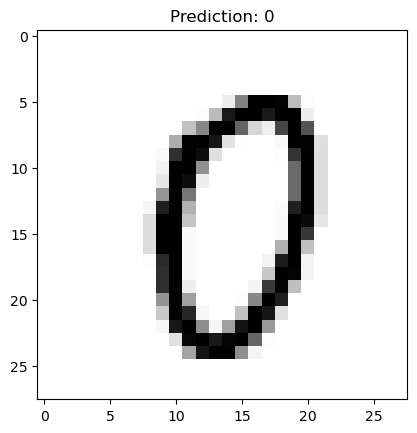

 n
Enter a number (0 - 59999):  700


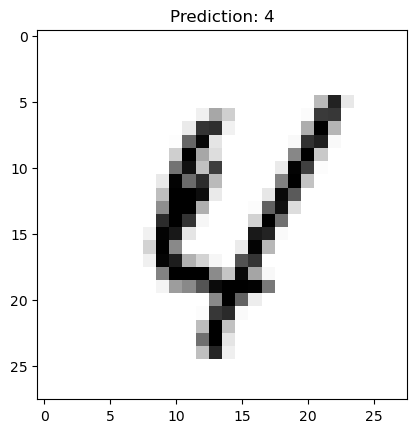

 n
Enter a number (0 - 59999):  8000


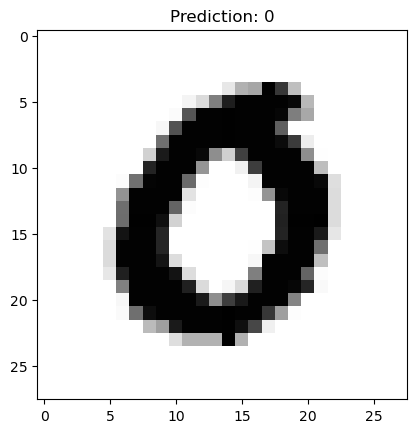

 n
Enter a number (0 - 59999):  4000


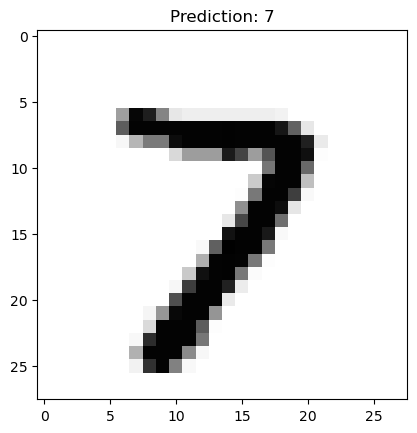

 n
Enter a number (0 - 59999):  5600


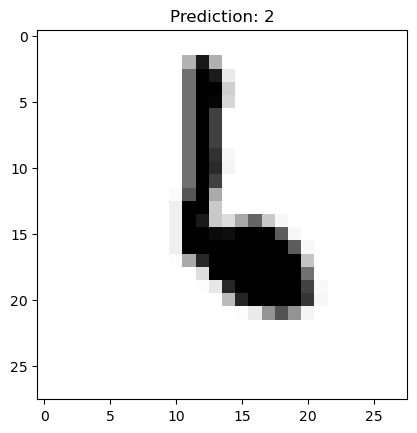

 y


In [81]:
while True :
    index = int(input("Enter a number (0 - 59999): "))
    img = np.array(X.iloc[index]).reshape(28,28)
    plt.imshow(img, cmap="Greys")
    img = img.reshape(-1,1)
    Hl_pred = np.dot(W1,img) + B1
    Act_Hl_pred = np.maximum(0,Hl_pred)
    Ol_pred = np.dot(W2,Act_Hl_pred) + B2
    Act_Ol_pred = 1 / (1 + np.exp(-Ol_pred))
    plt.title(f"Prediction: {Act_Ol_pred.argmax()}")
    plt.show()
    ch = input()
    if (ch == 'y' or ch == 'Y'):
        break

In [73]:
A = np.array(X.iloc[0]).reshape(28,28)
A = A.reshape(-1,1)
A.shape

(784, 1)